數據處理/統計探索/聚合運算/數據視覺化/特徵處理/數據建模<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
#  pd.set_option('display.max_rows', None)

萃取raw data<br>

In [3]:
resource = pd.read_csv(r'C:\Users\Itado\Desktop\notebook\BankChurners.csv')

In [4]:
extract = resource.iloc[:,0:-2]
extract.to_csv('extract.csv')

In [5]:
extract.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

檢查缺失值、重複紀錄<br>

In [7]:
extract.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [8]:
extract.duplicated().any()

False

In [9]:
extract['CLIENTNUM'].duplicated().any()

False

檢查不一致情況包含錯誤值、異常值<br>

In [10]:
extract['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27], dtype=int64)

In [11]:
extract['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

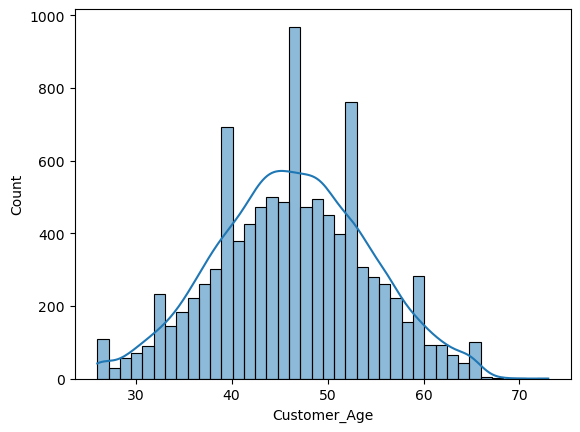

<Figure size 1000x400 with 0 Axes>

In [12]:
sns.histplot(extract['Customer_Age'], bins=40, kde=True)  # kde=True + Kernel Density Estimation
plt.figure(figsize=(10, 4))
plt.show()

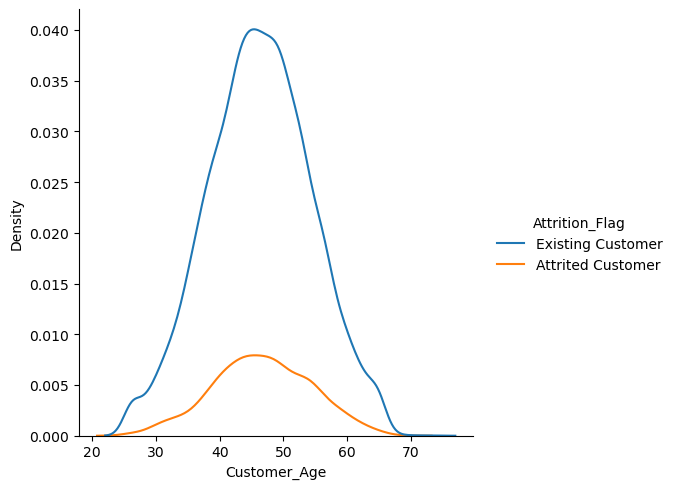

In [13]:
sns.displot(extract, x='Customer_Age', hue='Attrition_Flag', kind='kde')
plt.show()

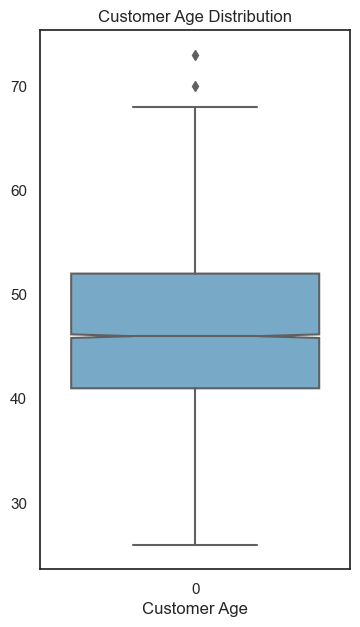

In [14]:
sns.set(style="white")
plt.figure(figsize=(4, 7))
sns.boxplot(data=extract['Customer_Age'], palette="Blues",  notch=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.show()

In [15]:
q1 = np.percentile(extract['Customer_Age'], 25)
q3 = np.percentile(extract['Customer_Age'], 75)
iqr = q3 - q1

outlier_top = extract['Customer_Age'][(extract['Customer_Age'] > q3 + 1 * iqr)].min()
outlier_bot = extract['Customer_Age'][(extract['Customer_Age'] < q1 - 1.25 * iqr)].max()
print(f"自定義離群數據={outlier_top}以上和{outlier_bot}以下的年紀")

自定義離群數據=64以上和27以下的年紀


In [16]:
import sqlite3

db1 = sqlite3.connect('db1.db')
extract.to_sql('age_table', db1, if_exists='replace', index=False)

query = 'SELECT Customer_Age, COUNT(Customer_Age), AVG(Total_Trans_Amt) FROM age_table WHERE Customer_Age > 64 or Customer_Age < 27 GROUP BY Customer_Age ORDER BY AVG(Total_Trans_Amt) DESC'
result = pd.read_sql_query(query, db1)
print(result)
db1.close()

   Customer_Age  COUNT(Customer_Age)  AVG(Total_Trans_Amt)
0            65                  101           2748.623762
1            26                   78           2586.641026
2            73                    1           1765.000000
3            67                    4           1667.750000
4            68                    2           1335.000000
5            66                    2           1325.000000
6            70                    1           1227.000000


In [17]:
extract['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

非數值類型數據編碼<br>

In [18]:
from sklearn.preprocessing import LabelEncoder

En = LabelEncoder()

encode = extract.copy()

encode = encode.apply(lambda columns: En.fit_transform(columns) if columns.dtype == 'object' else columns)

encode.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


欄位相關性視覺圖<br>

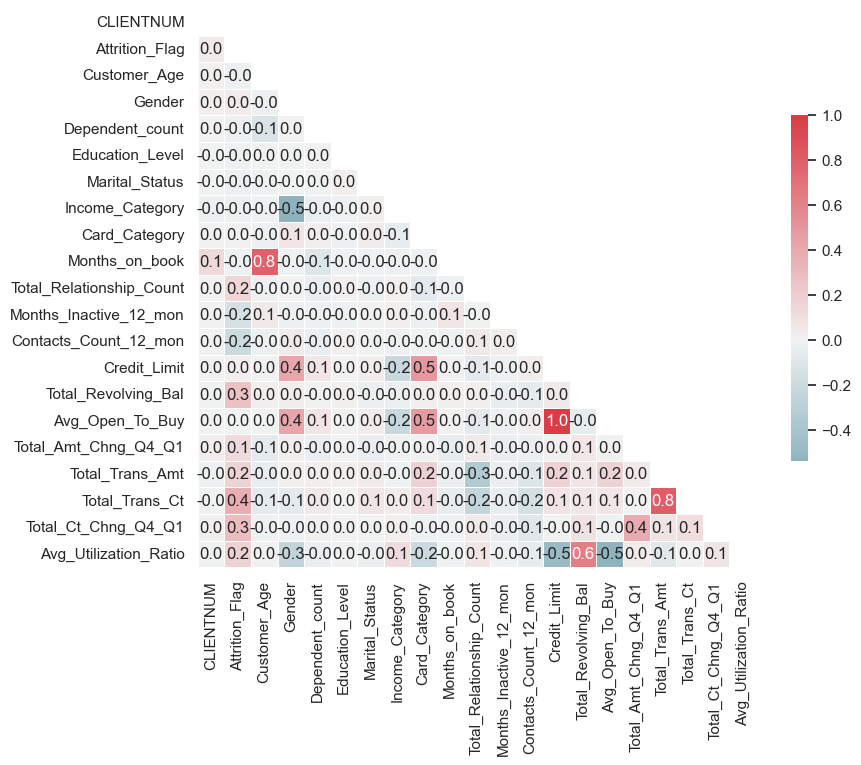

In [19]:
correlation_matrix = encode.corr()

sns.set(style="white")

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 

f, ax = plt.subplots(figsize=(9, 9)) 

cmap = sns.diverging_palette(220, 10, as_cmap=True) 


sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt=".1f")

plt.show()

In [20]:
encode.to_csv('encode.csv')

特徵選擇/特徵工程<br>

移除含未知值的特徵、USER ID、卡片類別、訂閱年份等判斷與流失行為無相關的特徵。<br>

In [21]:
remove= ['Education_Level','Marital_Status','Income_Category','Card_Category','CLIENTNUM','Months_on_book']
modeling = encode.drop(columns=remove)
modeling.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, validation_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

模型目標為預測 `Attrition_Flag`<br>

In [24]:
data = modeling.drop(['Attrition_Flag'],axis=1)
target = modeling['Attrition_Flag']

In [25]:
X = data
y = target

取值範圍調整<br> 

In [26]:
ss = StandardScaler() 
ssX = ss.fit_transform(X)
print(ssX.shape)

(10127, 14)


資料分為訓練使用和測試使用 避免模型作弊<br>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(ssX, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7088, 14) (7088,)
(3039, 14) (3039,)


In [28]:
svc= SVC() 
svc.fit(X_train,y_train)
print(svc.score(X_test, y_test))

0.9364922671931556


Support Vector Machine for Classification (SVC) 用於測試資料的準確率達 93.64% <br>

In [42]:
cv = cross_val_score(svc,ssX,y,cv=5,scoring='accuracy')
print(cv)
print(cv.mean())

[0.84600197 0.92645607 0.9437037  0.95160494 0.85925926]
0.9054051893288484


將資料分為多個子集 平均準確率達90.54% 客觀來說模型有一定程度過度擬合現象 

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

search = GridSearchCV(svc, param_grid, cv=5)
search.fit(X_train,y_train)

print('best table: ',search.best_params_)
print('best score: {:.2f}'.format(search.best_score_))

best table:  {'C': 10, 'gamma': 0.1}
best score: 0.94


In [31]:
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1]
}

search = GridSearchCV(svc, param_grid, cv=5)
search.fit(X_train,y_train)

print('best table: ',search.best_params_)
print('best score: {:.2f}'.format(search.best_score_))

best table:  {'C': 10, 'gamma': 0.1}
best score: 0.94


In [32]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svc=SVC(gamma=0.1,C=10)
search = GridSearchCV(svc, param_grid, cv=5)
search.fit(X_train,y_train)

print('best table: ',search.best_params_)
print('best score: {:.2f}'.format(search.best_score_))

best table:  {'kernel': 'rbf'}
best score: 0.94


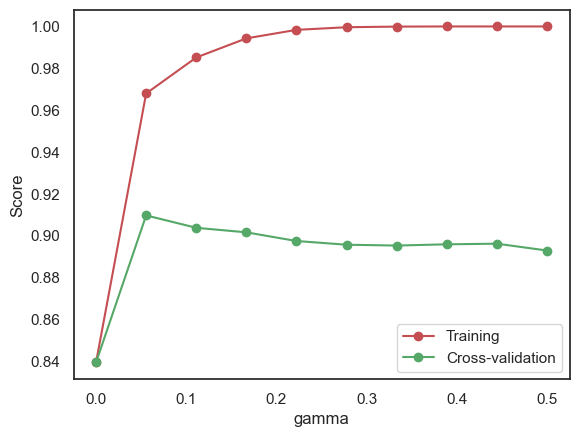

In [35]:
param_range = np.linspace(0,0.5,10)

train_score, test_score = validation_curve(SVC(C=10,kernel='rbf'), ssX, y, param_name='gamma',
                                           param_range=param_range, scoring="accuracy", cv=5)

train_score_mean = np.mean(train_score, axis=1)
test_score_mean = np.mean(test_score, axis=1)

plt.plot(param_range, train_score_mean, 'o-', color='r', label='Training')
plt.plot(param_range, test_score_mean, 'o-', color='g', label='Cross-validation')



plt.xlabel('gamma')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

gamma 參數值調整過程中的過擬合情形<br>

In [38]:
svc_save = SVC(gamma=0.05,kernel='rbf',C=10)
svc_save.fit(X_train,y_train)
print(svc_save.score(X_test,y_test))

0.9427443237907206


In [39]:
import joblib

In [40]:
joblib.dump(svc_save,'predict_box.pkl')

['predict_box.pkl']

In [41]:
model = joblib.load('predict_box.pkl')
print(model.predict(X_test[0:20]))

[1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
